<a href="https://colab.research.google.com/github/kumarasakti/MachineLearningDicoding/blob/master/Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-20 09:04:17--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.51MB/s    in 47s     

2020-07-20 09:05:05 (6.56 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scis_dir = os.path.join(base_dir, 'scissors')

In [186]:
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'rock', 'scissors', 'paper']

In [199]:
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='wrap',
    validation_split=0.2 
)
test_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    fill_mode='wrap',
)

In [198]:
train_generator = train_data.flow_from_directory(
    base_dir,
    target_size=(100,150),
    shuffle=True,
    class_mode='categorical',
    batch_size=32,
    subset='training'
)

validation_generator = train_data.flow_from_directory(
    base_dir,
    target_size=(100,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


Dalam pembuatan model saya menggunakan 4 layer dengan input shape 100,150. 

In [200]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [201]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy']
)

In [202]:
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2)

Epoch 1/20
25/25 - 14s - loss: 1.0088 - accuracy: 0.4525 - val_loss: 0.6870 - val_accuracy: 0.6812
Epoch 2/20
25/25 - 14s - loss: 0.4176 - accuracy: 0.8445 - val_loss: 0.2150 - val_accuracy: 0.9438
Epoch 3/20
25/25 - 14s - loss: 0.2497 - accuracy: 0.9254 - val_loss: 0.3241 - val_accuracy: 0.8500
Epoch 4/20
25/25 - 14s - loss: 0.2786 - accuracy: 0.8963 - val_loss: 0.2040 - val_accuracy: 0.9250
Epoch 5/20
25/25 - 14s - loss: 0.1818 - accuracy: 0.9456 - val_loss: 0.1451 - val_accuracy: 0.9438
Epoch 6/20
25/25 - 14s - loss: 0.1838 - accuracy: 0.9330 - val_loss: 0.1231 - val_accuracy: 0.9438
Epoch 7/20
25/25 - 14s - loss: 0.1325 - accuracy: 0.9600 - val_loss: 0.1794 - val_accuracy: 0.9312
Epoch 8/20
25/25 - 14s - loss: 0.1600 - accuracy: 0.9532 - val_loss: 0.1457 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 14s - loss: 0.1284 - accuracy: 0.9600 - val_loss: 0.1186 - val_accuracy: 0.9563
Epoch 10/20
25/25 - 14s - loss: 0.0813 - accuracy: 0.9787 - val_loss: 0.1182 - val_accuracy: 0.9250
Epoch 11/

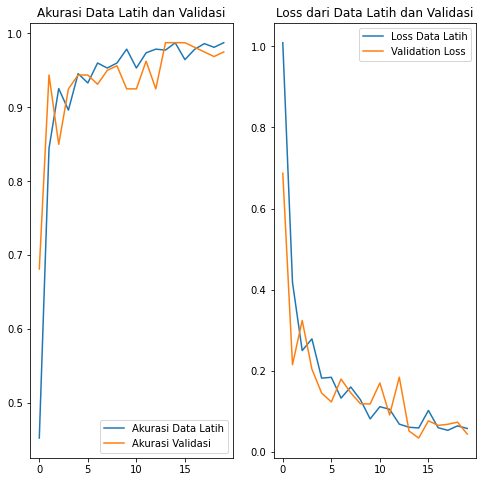

In [203]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Akurasi Data Latih')
plt.plot(epochs_range, val_acc, label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Data Latih dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss Data Latih')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss dari Data Latih dan Validasi')
plt.show()

display akurasi dan loss data diatas bisa dicapai dengan running model fit 4 kali. Awalnya sangat berantakan sekali.

Saving photo6102734076613077488.jpg to photo6102734076613077488 (2).jpg
photo6102734076613077488.jpg
paper alias kertas


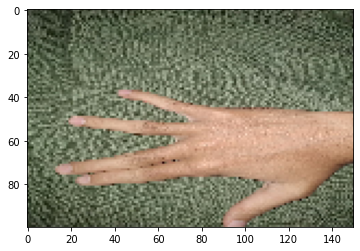

In [206]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper alias kertas')
  elif classes[0][1]==1:
    print('rock alias batu')
  elif classes[0][2]==1:
    print('scissor alias gunting')  
  else:
    print('gambar tidak diketahui')

Hasil diatas, merupakan gambar tangan yang saya ambil sendiri menggunakan kamera gawai pintar, karena kamera saya kurang bagus, hasil gambar menjadi pecah. Saya tidak menguji menggunakan gambar dari dataset karena, ditakutkan jika menggunakan gambar dataset akan terjadi overfitting.